## 13. Introduction to Spectral Analysis

**Exercise 13.1**.  Find $A$ and $B$ such that $3\cos(2\pi ft + 0.4) = A\cos(2\pi ft) + B\sin (2\pi ft)$.

**Solution**.  Since $\cos(a + b) = \cos a \cos b - \sin a \sin b$, we have:

$$
\begin{align}
3 \cos(2\pi ft + 0.4) 
&= 3(\cos (2\pi ft) \cos(0.4) - \sin (2\pi ft) \sin(0.4)) \\
&= (3 \cos (0.4)) \cos(2\pi ft) + (-3 \sin(0.4)) \sin (2\pi ft)
\end{align}
$$

and so $A = 3 \cos 0.4 \approx 2.763$ and $B = -3 \sin 0.4 \approx 1.168$.

**Exercise 13.2**.  Find $R$ and $\Phi$ so that $R \cos (2\pi ft + \Phi) = \cos (2\pi ft) + 3 \sin(2\pi ft)$.

**Solution**.  We have:

$$ R \cos (2\pi ft + \Phi) = R \cos (2\pi ft) \cos \Phi - R \sin (2\pi ft) \sin \Phi $$

and so comparing with the given equation we get

$$ R \cos \Phi = 1 \quad \text{and} \quad R \sin \Phi = -3 $$

Adding the squares of these,

$$ R^2 = R^2 (\cos^2 \Phi + \sin^2 \Phi) = 1^2 + (-3)^2 = 10 $$

so by selecting a positive magnitude rather than the negative one we obtain $R = \sqrt{10} \approx 3.1623$.

Now, dividing the two equations above,

$$ \tan \Phi = \frac{\sin \Phi}{\cos \Phi} = -3 $$

so $ \Phi = \tan^{-1} (-3) \approx -1.249$.

**Exercise 13.3**.  Consider the series displayed in Exhibit 13.2 on page 320.

**(a)** Verify that regressing the series on $\cos (2\pi ft)$ and $\sin (2\pi ft)$ for $f = 4/96$ provides perfect estimates of $A$ and $B$.

**(b)** Use Equations (13.1.5) on page 321 to obtain the relationship between $R$, $\Phi$, $A$ and $B$ for the cosine component at frequency $f = 4/96$. (For this component, the amplitude is 3 and the phase is $0.6 \pi$.)

**(c)** Verify that regressing the series on $\cos (2\pi ft)$ and $\sin (2\pi ft)$ for $f = 14/96$ provides perfect estimates of $A$ and $B$.

**(d)** Verify that regressing the series on $\cos (2\pi ft)$ and $\sin (2\pi ft)$ for both $f = 4/96$ and $f = 14/96$ together provides perfect estimates of $A_4$, $B_4$, $A_{14}$ and $B_{14}$.

**(e)** Verify that regressing the series on $\cos (2\pi ft)$ and $\sin (2\pi ft)$ for both $f = 3/96$ and $f = 13/96$ together provides perfect estimates of $A_3$, $B_3$, $A_{13}$ and $B_{13}$.

**(f)** Repeat part (e) but add a third pair of cosine-sine predictor variables at any other Fourier frequency.  Verify that all of the regression coefficients are still estimated perfectly.

**Solution**.

In [1]:
require(data.table)
require(ggplot2)

Loading required package: data.table

Loading required package: ggplot2



In [2]:
n = 96
t = 1:n
Y = 2 * cos(2*pi*t*4/96) + 3 * cos(2*pi*(t*14/96 + 0.3))

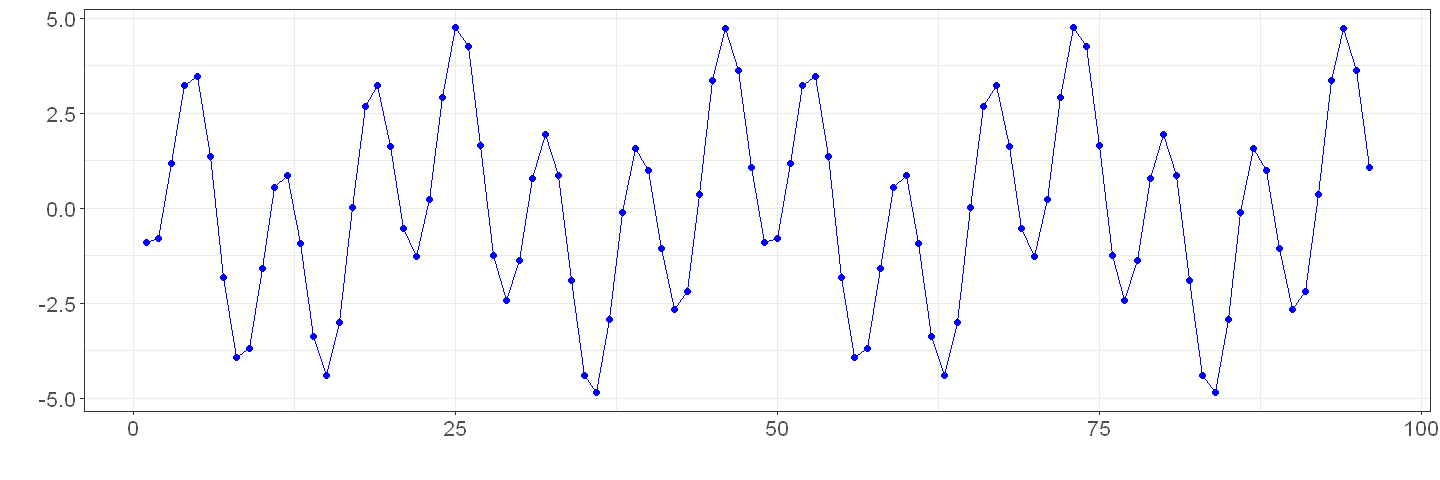

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=t, y=Y), color='blue') +
  geom_point(aes(x=t, y=Y), color='blue') +
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(a)**

In [4]:
data = data.table(
    Y=Y,
    cos4=cos(2*pi*t*4/96),
    sin4=sin(2*pi*t*4/96)
)

model = lm(Y ~ cos4 + sin4 - 1, data=data)
summary(model)


Call:
lm(formula = Y ~ cos4 + sin4 - 1, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-2.996 -2.063  0.000  2.063  2.996 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
cos4 2.000e+00  3.094e-01   6.464 4.51e-09 ***
sin4 4.487e-16  3.094e-01   0.000        1    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.144 on 94 degrees of freedom
Multiple R-squared:  0.3077,	Adjusted R-squared:  0.293 
F-statistic: 20.89 on 2 and 94 DF,  p-value: 3.119e-08


This provides perfect estimates for $A = 2$ and $B = 0$.

**(b)**  Equation (13.1.5) states that, for

$$ R \cos(2\pi ft + \Phi) = A \cos(2\pi ft) + B \sin(2\pi ft) $$

we have

$$ A = R \cos \Phi \quad \text{and} \quad B = -R \sin \Phi $$

Then, for the cosine component at frequency $f = 4/96$,

- $R = 3$
- $\Phi = 0.6\pi$
- $A = 3 \cos (0.6 \pi) \approx -0.927$
- $B = -3 \sin (0.6 \pi) \approx -2.853$

**(c)**

In [5]:
data = data.table(
    Y=Y,
    cos14=cos(2*pi*t*14/96),
    sin14=sin(2*pi*t*14/96)
)

model = lm(Y ~ cos14 + sin14 - 1, data=data)
summary(model)


Call:
lm(formula = Y ~ cos14 + sin14 - 1, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-2.000 -1.414  0.000  1.414  2.000 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
cos14  -0.9271     0.2063  -4.494 1.99e-05 ***
sin14  -2.8532     0.2063 -13.831  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.429 on 94 degrees of freedom
Multiple R-squared:  0.6923,	Adjusted R-squared:  0.6858 
F-statistic: 105.7 on 2 and 94 DF,  p-value: < 2.2e-16


**(d)**

In [6]:
data = data.table(
    Y=Y,
    cos4=cos(2*pi*t*4/96),
    sin4=sin(2*pi*t*4/96),
    cos14=cos(2*pi*t*14/96),
    sin14=sin(2*pi*t*14/96)
)

model = lm(Y ~ cos4 + sin4 + cos14 + sin14 - 1, data=data)
summary(model)


Call:
lm(formula = Y ~ cos4 + sin4 + cos14 + sin14 - 1, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-5.136e-14 -6.091e-15 -5.960e-16  7.705e-15  2.852e-14 

Coefficients:
        Estimate Std. Error    t value Pr(>|t|)    
cos4   2.000e+00  1.890e-15  1.058e+15   <2e-16 ***
sin4  -1.229e-15  1.890e-15 -6.500e-01    0.517    
cos14 -9.271e-01  1.890e-15 -4.905e+14   <2e-16 ***
sin14 -2.853e+00  1.890e-15 -1.509e+15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.31e-14 on 92 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 9.097e+29 on 4 and 92 DF,  p-value: < 2.2e-16


**(e)**

In [7]:
data = data.table(
    Y=Y,
    cos3=cos(2*pi*t*3/96),
    sin3=sin(2*pi*t*3/96),
    cos13=cos(2*pi*t*13/96),
    sin13=sin(2*pi*t*13/96)
)

model = lm(Y ~ cos3 + sin3 + cos13 + sin13 - 1, data=data)
summary(model)


Call:
lm(formula = Y ~ cos3 + sin3 + cos13 + sin13 - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8532 -1.8291  0.1309  1.6302  4.7598 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)
cos3  -7.051e-16  3.759e-01       0        1
sin3   2.243e-16  3.759e-01       0        1
cos13 -2.884e-16  3.759e-01       0        1
sin13 -5.128e-15  3.759e-01       0        1

Residual standard error: 2.604 on 92 degrees of freedom
Multiple R-squared:  1.784e-30,	Adjusted R-squared:  -0.04348 
F-statistic: 4.104e-29 on 4 and 92 DF,  p-value: 1


Note that the estimates are, correctly, all zero.

**(f)**

In [8]:
data = data.table(
    Y=Y,
    cos3=cos(2*pi*t*3/96),
    sin3=sin(2*pi*t*3/96),
    cos13=cos(2*pi*t*13/96),
    sin13=sin(2*pi*t*13/96),
    cos17=cos(2*pi*t*17/96),
    sin17=sin(2*pi*t*17/96)
)

model = lm(Y ~ cos3 + sin3 + cos13 + sin13 + cos17 + sin17 - 1, data=data)
summary(model)


Call:
lm(formula = Y ~ cos3 + sin3 + cos13 + sin13 + cos17 + sin17 - 
    1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8532 -1.8291  0.1309  1.6302  4.7598 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)
cos3  -7.051e-16  3.801e-01       0        1
sin3   2.243e-16  3.801e-01       0        1
cos13 -2.884e-16  3.801e-01       0        1
sin13 -5.128e-15  3.801e-01       0        1
cos17 -1.410e-15  3.801e-01       0        1
sin17  9.615e-17  3.801e-01       0        1

Residual standard error: 2.633 on 90 degrees of freedom
Multiple R-squared:  1.956e-30,	Adjusted R-squared:  -0.06667 
F-statistic: 2.934e-29 on 6 and 90 DF,  p-value: 1


Estimates are still, correctly, all zero.

**Exercise 13.4**.  Generate or choose any series of length n = 10. Show that the series may be fit exactly by a linear combination of enough cosine-sine curves at the Fourier frequencies.

**Solution**.  Let $\{Y_1, Y_2, \dots, Y_{10}\}$ be the arbitrary series of length $n = 10$.  Also let

$$ \hat{A}_0 = \overline{Y} = \frac{1}{n} \sum_{t=1}^n Y_t $$

and in general

$$ \hat{A}_j = \frac{2}{n} \sum_{t=1}^n Y_t \cos \frac{2 \pi t j}{n}
\quad \text{and} \quad
\hat{B}_j = \frac{2}{n} \sum_{t=1}^n Y_t \sin \frac{2 \pi t j}{n}
$$

Then we have for each $t$

$$ 
\begin{align}
& \hat{A}_0 + \sum_{j=1}^{n/2} \left[ \hat{A}_j \cos \frac{2 \pi t j}{n} + \hat{B}_j \sin \frac{2 \pi t j}{n} \right] \\
&= \left( \frac{1}{n} \sum_{j=1}^n Y_j \right) + \frac{2}{n} \sum_{j=1}^{n/2} \left[ \sum_{s=1}^n Y_s \left( \cos \frac{2 \pi t j}{n} \cos \frac{2 \pi s j}{n} + \sin \frac{2 \pi t j}{n} \sin \frac{2 \pi s j}{n} \right) \right] \\
&= \left( \frac{1}{n} \sum_{j=1}^n Y_j \right) + \frac{2}{n} \sum_{j=1}^{n/2} \sum_{s=1}^n Y_s \cos \frac{2\pi (t - s) j}{n} \\
&= \frac{1}{n} \sum_{s=1}^n Y_s \left[ 1 + \sum_{j=1}^n \cos \frac{2\pi (t - s) j}{n} \right] \\
&= \sum_{s=1}^n Y_s I(s = t) = Y_t
\end{align}
$$

**Exercise 13.5**.  Simulate a signal + noise time series from the model in Equation (13.2.4) on page 323. Use the same parameter values used in Exhibit 13.4 on page 324.

**(a)** Plot the time series and look for the periodicities. Can you see them?

**(b)** Plot the periodogram for the simulated series. Are the periodicities clear now?

**Solution**.  The model from Equation (13.2.4) is

$$ Y_t = A_1 \cos(2\pi f_1 t) + B_1 \sin(2\pi f_1 t) + A_2 \cos(2\pi f_2 t) + B_2 \sin(2\pi f_2 t) + W_t $$

and the series in Exhibit 13.2.4 is reconstructed in R as follows:

```
set.seed(134); t=1:96; integer=sample(48,2)
freq1=integer[1]/96; freq2=integer[2]/96
A1=rnorm(1,0,2); B1=rnorm(1,0,2)
A2=rnorm(1,0,3); B2=rnorm(1,0,3); w=2*pi*t
y=A1*cos(w*freq1)+B1*sin(w*freq1)+A2*cos(w*freq2)+ B2*sin(w*freq2)+rnorm(96,0,1)
write.csv(y, file='../data/exercise.13.5.dat', quote=F, row.names=F)
```

In [9]:
Y = fread('../data/exercise.13.5.dat')[['x']]
t = 1:length(Y)

**(a)**

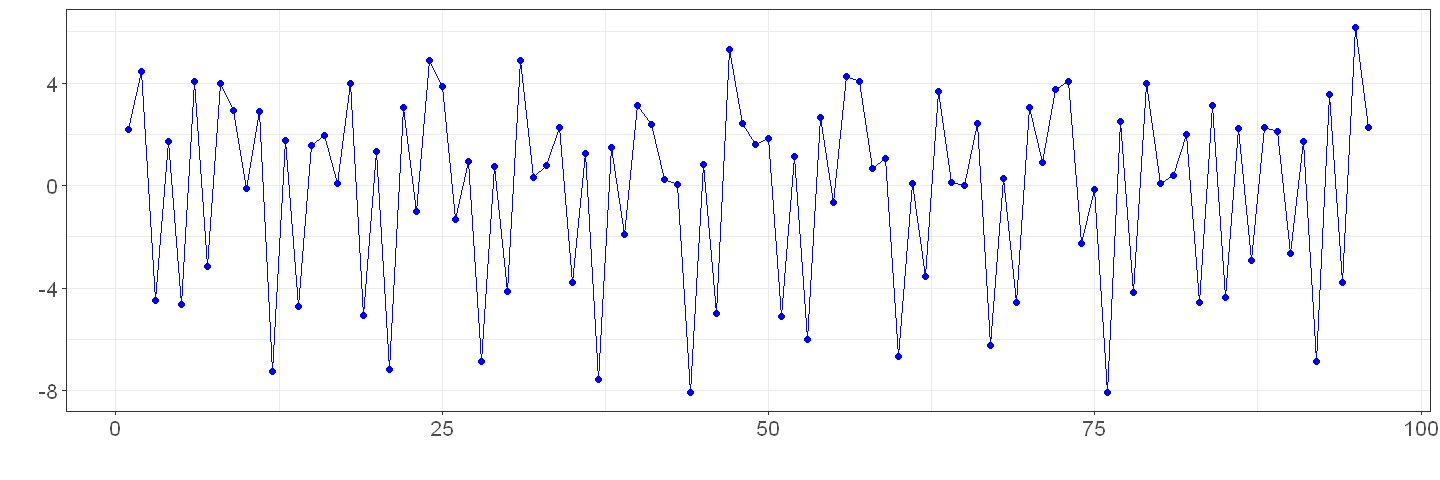

In [10]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=t, y=Y), color='blue') +
  geom_point(aes(x=t, y=Y), color='blue') +
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

Periodicity is somewhat visible, though separating both periods is difficult.

**(b)**

In [11]:
source('periodogram.R')

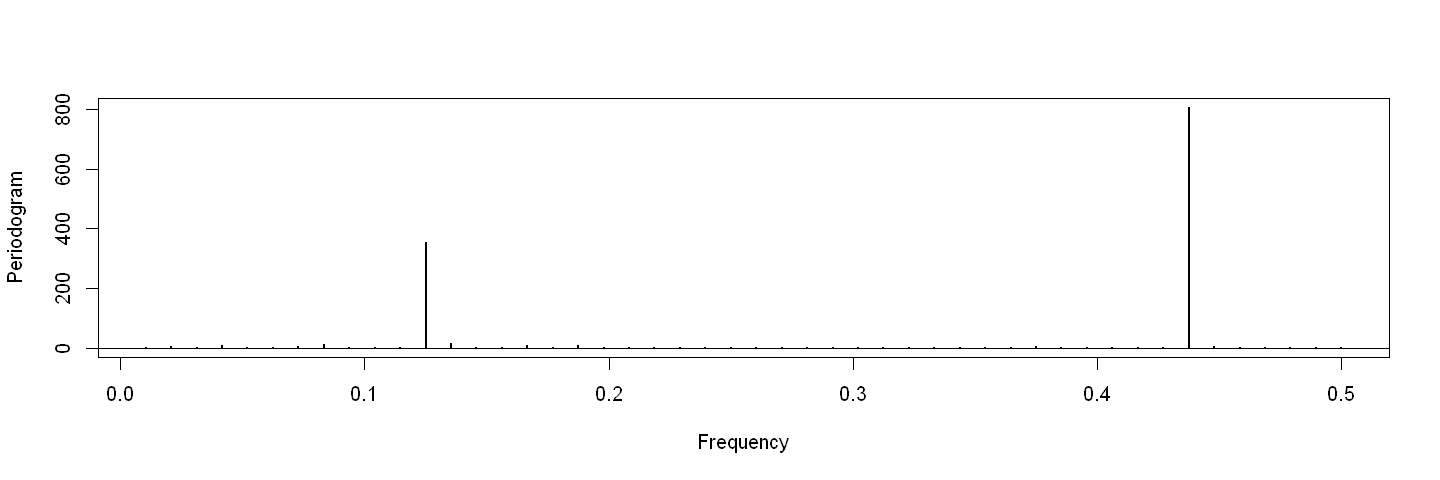

In [12]:
periodogram(Y); abline(h=0)

The two frequency components now are extremely salient as the two peaks in the graph.

**Exercise 13.6**. Show that the covariance function for the series defined by Equation (13.3.1) on page 327 is given by the expression in Equation (13.3.2).